In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
if os.access('propiedades.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/propiedades.csv > propiedades.csv
    else:
        !wget propiedades.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/propiedades.csv

In [3]:
df = pd.read_csv("propiedades.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Unnamed: 0,latitud,longitud,precio,m2,ambientes
count,1050.000000,1050.000000,1050.000000,1050.000000,1048.000000,1044.000000
mean,524.500000,-34.526132,-58.423896,35737.122857,62.232777,2.143678
std,303.253195,2.549434,2.319076,49897.697379,56.281333,1.339870
min,0.000000,-38.505290,-120.740135,27.000000,0.000000,0.000000
25%,262.250000,-34.608908,-58.448631,16800.000000,35.000000,1.000000
50%,524.500000,-34.594705,-58.423578,25000.000000,45.000000,2.000000
75%,786.750000,-34.578902,-58.395060,39000.000000,70.000000,3.000000
max,1049.000000,47.751076,-34.588875,820000.000000,700.000000,18.000000
Nan,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.190476,0.571429


In [4]:
df.head()

,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,2020_10_11,-34.611270,-58.36378,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,2020_10_11,-34.589848,-58.50942,https://departamento.mercadolibre.com.ar/MLA-7...,Oportunidad! Monoambiente A Estrenar - Alquile...,Departamento,50.0,USD,38.0,1.0
2,2,2020_10_11,-34.605970,-34.60597,https://departamento.mercadolibre.com.ar/MLA-8...,Alquiler Temporario De Lujo 4/p Hospital Itali...,Departamento,1866.0,ARS,57.0,1.0
3,3,2020_10_11,-34.590656,-58.44873,https://departamento.mercadolibre.com.ar/MLA-8...,Excelente Departamento 3 Ambientes (2 Cuartos)...,Departamento,30000.0,ARS,60.0,3.0
4,4,2020_10_11,-34.624084,-58.38989,https://departamento.mercadolibre.com.ar/MLA-8...,Departamentos Alquil Temporario Centro Cap Fed...,Departamento,2100.0,ARS,64.0,3.0


In [5]:
df_clean = df.copy()
df_clean.dropna(subset=['m2'], inplace=True)
df_clean.dropna(subset=['ambientes'], inplace=True)

In [6]:
df_clean.shape

(1044, 11)

In [7]:
df_clean.head()

,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,2020_10_11,-34.611270,-58.36378,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,2020_10_11,-34.589848,-58.50942,https://departamento.mercadolibre.com.ar/MLA-7...,Oportunidad! Monoambiente A Estrenar - Alquile...,Departamento,50.0,USD,38.0,1.0
2,2,2020_10_11,-34.605970,-34.60597,https://departamento.mercadolibre.com.ar/MLA-8...,Alquiler Temporario De Lujo 4/p Hospital Itali...,Departamento,1866.0,ARS,57.0,1.0
3,3,2020_10_11,-34.590656,-58.44873,https://departamento.mercadolibre.com.ar/MLA-8...,Excelente Departamento 3 Ambientes (2 Cuartos)...,Departamento,30000.0,ARS,60.0,3.0
4,4,2020_10_11,-34.624084,-58.38989,https://departamento.mercadolibre.com.ar/MLA-8...,Departamentos Alquil Temporario Centro Cap Fed...,Departamento,2100.0,ARS,64.0,3.0


In [8]:
df_ars = df_clean[df_clean['moneda'] == 'ARS']
print('Cantidad de datos en observacion:', df_ars.shape[0])

Cantidad de datos en observacion: 928


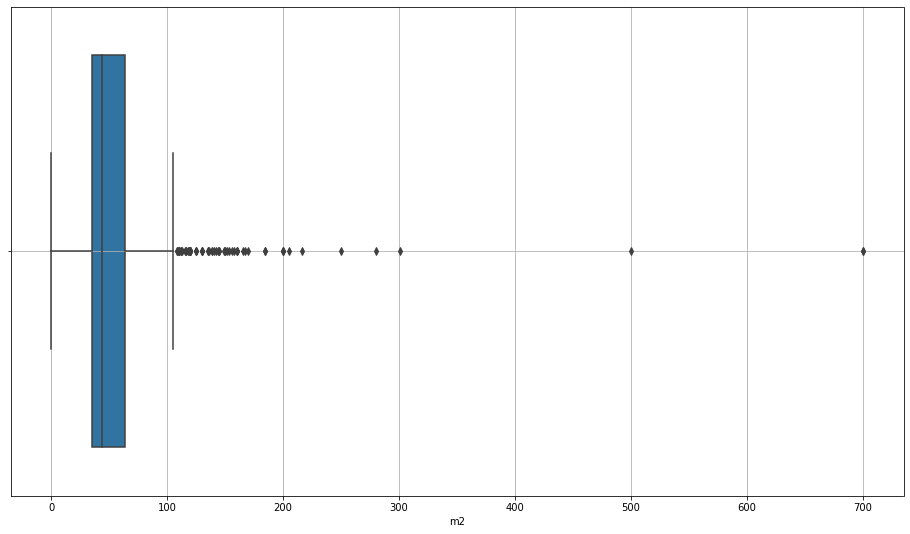

In [9]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.boxplot(x=df_ars['m2'], ax=ax)
ax.grid('dashed')

In [10]:
propiedades = df_ars[(df_ars['m2'] < 200) & (df_ars['m2'] > 50)]

In [11]:
print(propiedades.shape[0])

323


In [12]:
propiedades.head()

,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
2,2,2020_10_11,-34.605970,-34.605970,https://departamento.mercadolibre.com.ar/MLA-8...,Alquiler Temporario De Lujo 4/p Hospital Itali...,Departamento,1866.0,ARS,57.0,1.0
3,3,2020_10_11,-34.590656,-58.448730,https://departamento.mercadolibre.com.ar/MLA-8...,Excelente Departamento 3 Ambientes (2 Cuartos)...,Departamento,30000.0,ARS,60.0,3.0
4,4,2020_10_11,-34.624084,-58.389890,https://departamento.mercadolibre.com.ar/MLA-8...,Departamentos Alquil Temporario Centro Cap Fed...,Departamento,2100.0,ARS,64.0,3.0
7,7,2020_10_11,-34.578410,-58.440410,https://departamento.mercadolibre.com.ar/MLA-8...,Alquiler Temporario Amoblado Av. Federico Lacr...,Departamento,3500.0,ARS,65.0,2.0
8,8,2020_10_11,-34.578278,-58.449863,https://departamento.mercadolibre.com.ar/MLA-8...,Departamento Amoblado Temporario De Catergoria...,Departamento,3000.0,ARS,55.0,2.0


In [13]:
X = propiedades[['m2']].values
y = propiedades['precio'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_hat= lr.predict(X_test)

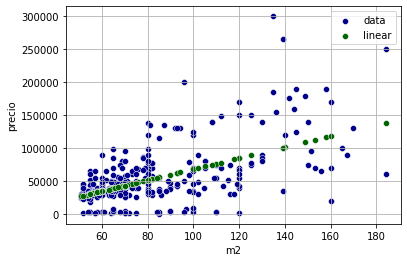

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.scatterplot(x=propiedades['m2'], y=propiedades['precio'], color='darkBlue', ax=ax, label='data')
ax = sns.scatterplot(x=X_test[:, 0], y=y_hat, color='darkGreen', ax=ax, label='linear')
ax.grid('dashed')
ax.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {score:.2f}")

Coeficiente de determinación: 0.40


c:\users\joaquin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='m2', ylabel='precio'>

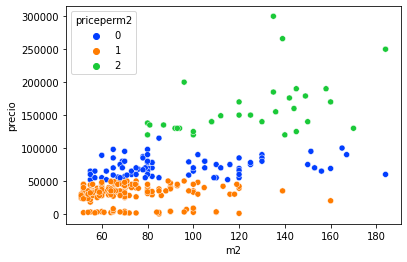

In [21]:
from sklearn.cluster import KMeans

X_clustering = propiedades[['m2', 'precio']].values

kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
kmeans.fit(X_clustering)
propiedades['priceperm2'] = kmeans.predict(X_clustering)

sns.scatterplot(data=propiedades, x='m2', y='precio', hue='priceperm2', palette='bright')

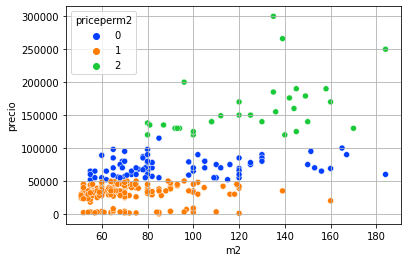

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.scatterplot(x=propiedades['m2'], y=propiedades['precio'], hue=propiedades['priceperm2'], palette='bright', ax=ax)
ax.grid('dashed')
plt.show()

In [23]:
n_clusters = propiedades['priceperm2'].unique()
lr_models = []

for cluster in n_clusters:

    df_cluster = propiedades[propiedades['priceperm2'] == cluster]

    X_clust = df_cluster[['m2']].values
    y_clust = df_cluster['precio'].values

    X_train_clust, X_test_clust, y_train_clust, y_test_clust = train_test_split(X_clust, y_clust, test_size=0.3, random_state=42)

    lr = linear_model.LinearRegression()
    lr.fit(X_train_clust, y_train_clust)
    y_hat_clust = lr.predict(X_test_clust)

    score = r2_score(y_test_clust, y_hat_clust)
    print(f"Coeficiente de determinación: {score:.2f} para el cluster", cluster)
    lr_models.append(lr)


Coeficiente de determinación: -0.02 para el cluster 1
Coeficiente de determinación: -0.09 para el cluster 0
Coeficiente de determinación: 0.22 para el cluster 2
